In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	.Aqua Kana
	.Keyboard
	.New York
	.SF Arabic
	.SF Arabic Rounded
	.SF Compact
	.SF Compact Rounded
	.SF NS Mono
	.SF NS Rounded
	.ThonburiUI
	Academy Engraved LET
	Al Bayan
	Al Nile
	Al Tarikh
	American Typewriter
	Andale Mono
	Anonymous Pro for Powerline
	Apple Braille
	Apple Chancery
	Apple SD Gothic Neo
	Apple Symbols
	AppleGothic
	AppleMyungjo
	Arial
	Arial Black
	Arial Hebrew
	Arial Narrow
	Arial Rounded MT Bold
	Arial Unicode MS
	Arimo for Powerline
	Athelas
	Avenir
	Avenir Next
	Avenir Next Condensed
	Ayuthaya
	Baghdad
	Bangla MN
	Bangla Sangam MN
	Baskerville
	Beirut
	Big Caslon
	Bodoni 72
	Bodoni 72 Oldstyle
	Bodoni 72 Smallcaps
	Bodoni Ornaments
	Bradley Hand
	Brush Script MT
	Chalkboard
	Chalkboard SE
	Chalkduster
	Charter
	Cochin
	Comic Sans MS
	Copperplate
	Corsiva Hebrew
	Courier
	Courier New
	Cousine for Powerline
	DIN Alternate
	DIN Condensed
	Damascus
	DecoType Naskh
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	D

In [30]:
random_df = pd.read_csv('./data/log_standard_4_08_to_4_21_pure.csv')
random_df.head(20)

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,1527,20220411,1900,1649675512388,0,0,0,0,0,0,0,1385,209900,0,0,0,0,1
1,0,7405,20220416,2000,1650111976017,0,0,0,0,0,0,0,0,65400,0,0,0,0,0
2,0,6026,20220420,1600,1650444367095,0,0,0,0,0,0,0,1405,170833,0,0,0,0,1
3,1,6354,20220411,1100,1649645295928,0,0,0,0,0,0,0,0,255160,0,0,0,0,8
4,1,3645,20220411,1100,1649648827559,0,0,0,0,0,0,0,1970,79733,0,0,0,0,1
5,1,4073,20220412,300,1649706052290,1,0,0,0,0,0,1,115607,114680,0,0,0,0,1
6,1,1725,20220412,400,1649706789917,1,0,0,0,0,0,1,158156,156433,0,0,0,0,1
7,1,3891,20220412,400,1649707373426,1,0,0,0,0,0,1,62093,173800,0,0,0,0,1
8,1,5606,20220412,400,1649708149549,0,0,0,0,0,0,0,0,109320,0,0,0,0,0
9,1,4352,20220417,1100,1650165081534,1,1,0,0,0,0,1,32486,12576,0,0,0,0,1


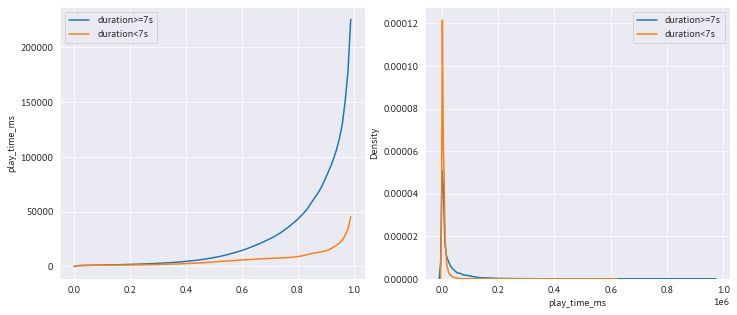

In [41]:
long_video = random_df[(random_df['duration_ms'] >= 7000) & (random_df['play_time_ms'] > 0)]
short_video = random_df[(random_df['duration_ms'] < 7000) & (random_df['play_time_ms'] > 0)]
x = [i/100 for i in range(100)]
long_y = long_video['play_time_ms'].quantile(x)
short_y = short_video['play_time_ms'].quantile(x)
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
plt.plot(x, long_y, label='duration>=7s')
plt.plot(x, short_y, label='duration<7s')
plt.ylabel('play_time_ms')
plt.legend()
fig.add_subplot(1, 2, 2)
sns.kdeplot(long_video['play_time_ms'], label='duration>=7s')
sns.kdeplot(short_video['play_time_ms'], label='duration<7s')
plt.xlabel('play_time_ms')
plt.legend()
plt.savefig('./data/figure/duration_compare.png')

In [89]:
category_features = (['user_id', 'week', 'hour', 'user_active_degree', 'is_lowactive_period', 'is_video_author',
                     'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range'] +
                     [f'onehot_feat{i}' for i in range(18)] +
                     ['video_id', 'author_id', 'upload_type', 'tag'])
continuous_features = ['duration_ms', 'server_width', 'server_height', 'follow_user_num', 'fans_user_num', 'friend_user_num']
labels = ['is_click', 'is_like', 'is_follow', 'is_comment', 'is_forward', 'long_view', 'is_not_hate']
raw_df = pd.read_csv('./data/log_standard_4_08_to_4_21_pure.csv')
user_df = pd.read_csv('./data/user_features_pure.csv')
video_df = pd.read_csv('./data/video_features_basic_pure.csv')
raw_df = raw_df.merge(user_df, on=['user_id'])
raw_df = raw_df.merge(video_df, on=['video_id'])
# 处理时间
raw_df['hour'] = raw_df['hourmin'] // 100
# 加入星期几特征
raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y%m%d')
raw_df['week'] = raw_df['date'].dt.day_name()
# 处理视频时长
raw_df['duration_ms'] = raw_df['duration_ms'] // 100

# 处理tag
raw_df['tag'] = raw_df['tag'].apply(lambda x:str(x).split(',')[0])

# 处理hate标签
raw_df['is_not_hate'] = 1 - raw_df['is_hate']

In [72]:
raw_df.head()

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,...,upload_type,visible_status,video_duration,server_width,server_height,music_id,music_type,tag,week,is_not_hate
0,0,1527,2022-04-11,19,1649675512388,0,0,0,0,0,...,Web,0.0,209900.0,1172.0,720.0,9154013497,9.0,39,Monday,1
1,29,1527,2022-04-11,14,1649657548854,0,0,0,0,0,...,Web,0.0,209900.0,1172.0,720.0,9154013497,9.0,39,Monday,1
2,40,1527,2022-04-14,18,1649931957306,1,0,0,0,0,...,Web,0.0,209900.0,1172.0,720.0,9154013497,9.0,39,Thursday,1
3,101,1527,2022-04-12,20,1649764966178,0,0,0,0,0,...,Web,0.0,209900.0,1172.0,720.0,9154013497,9.0,39,Tuesday,1
4,120,1527,2022-04-10,21,1649595493466,0,0,0,0,0,...,Web,0.0,209900.0,1172.0,720.0,9154013497,9.0,39,Sunday,1


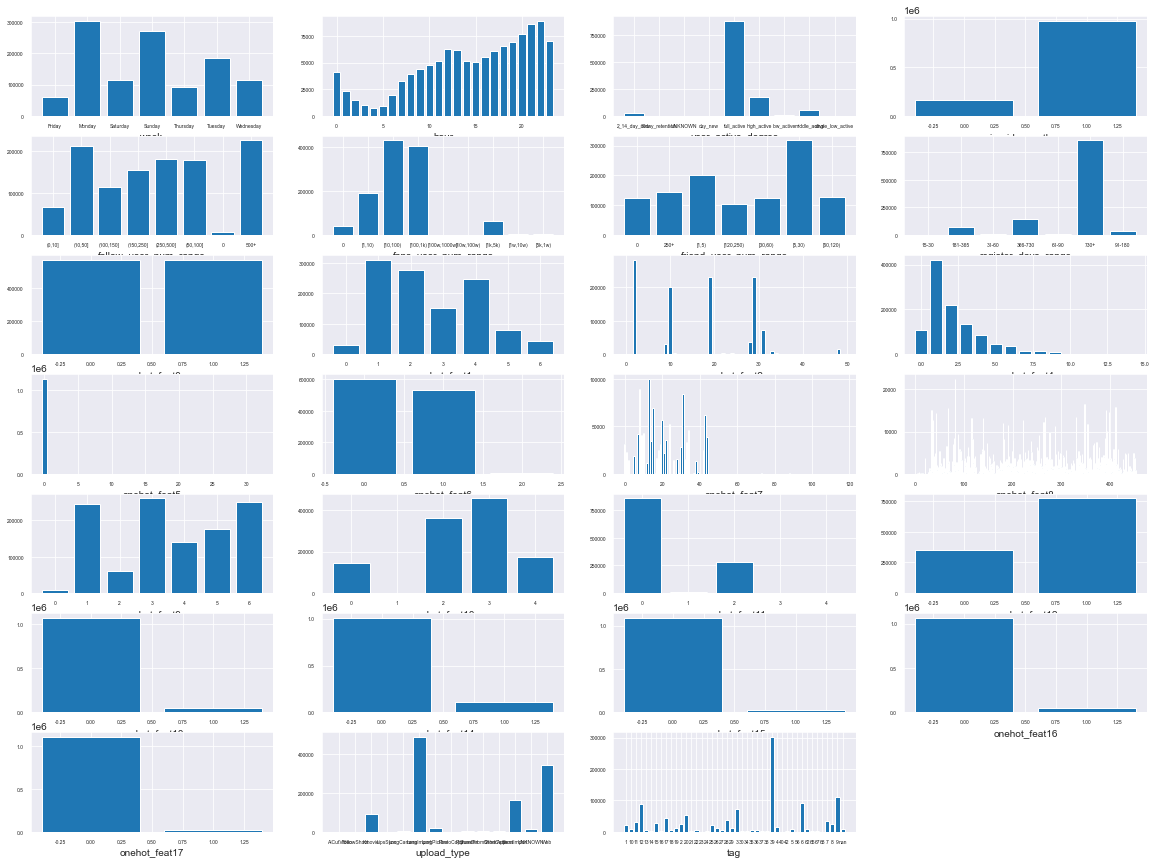

In [97]:
fig = plt.figure(figsize=(20, 15))
cnt = 0
for idx, fea in enumerate(category_features):
    if fea not in ['user_id', 'video_id', 'author_id', 'music_id', 'onehot_feat3', 'is_lowactive_period']:
        fig.add_subplot(7, 4, cnt+1)
        fea_count = raw_df[fea].value_counts().reset_index()
        if fea in ['hourmin']+['onehot_feat'+str(i) for i in range(18)]:
            fea_count['index'] = fea_count['index'].map(int)
        fea_count = fea_count.sort_values('index')
        # print(fea_count)
        plt.bar(fea_count['index'], fea_count[fea])
        plt.xlabel(fea)
        plt.xticks(fontsize=5)  # 设置x轴刻度标签的字体大小
        plt.yticks(fontsize=5)  # 设置y轴刻度标签的字体大小
        cnt += 1
plt.savefig('./data/figure/features_bar.png')
plt.show()

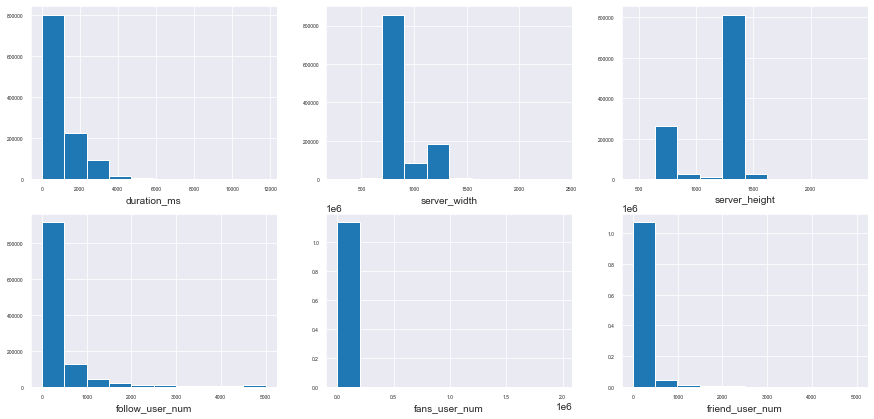

In [99]:
fig = plt.figure(figsize=(15, 7))
for idx, fea in enumerate(continuous_features):
    fig.add_subplot(2, 3, idx+1)
    plt.hist(raw_df[fea])
    plt.xlabel(fea)
    plt.xticks(fontsize=5)  # 设置x轴刻度标签的字体大小
    plt.yticks(fontsize=5)  # 设置y轴刻度标签的字体大小
plt.savefig('./data/figure/features_hist.png')
plt.show()

user_id
0         7
1         9
2        92
3        45
4        18
         ..
27280    58
27281    54
27282     2
27283    79
27284    10
Name: video_id, Length: 26210, dtype: int64


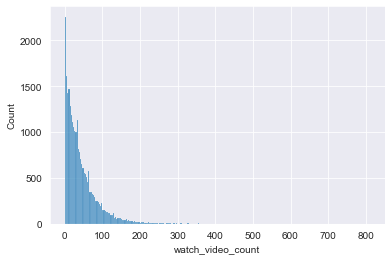

0.20217474246470812


In [102]:
user_count = raw_df.groupby('user_id')['video_id'].count()
# fig = plt.figure(figsize=(15, 7))
print(user_count)
# fig.add_subplot(1, 2, 1)
sns.histplot(user_count)
plt.xlabel('watch_video_count')
plt.show()
print((user_count <= 10).sum() / user_count.shape[0])
# plt.savefig('./data/figure/user_count.png')